# Vibrational Spectroscopy

In [72]:
# import some libraries
import numpy as np                # for vector, matrix etc data structures and manipulations
import matplotlib.pyplot as plt   # for plotting
import warnings
warnings.filterwarnings('ignore')

In [73]:
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

## Blackbody catastrophe

$B(\lambda,T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}. \tag{2}$

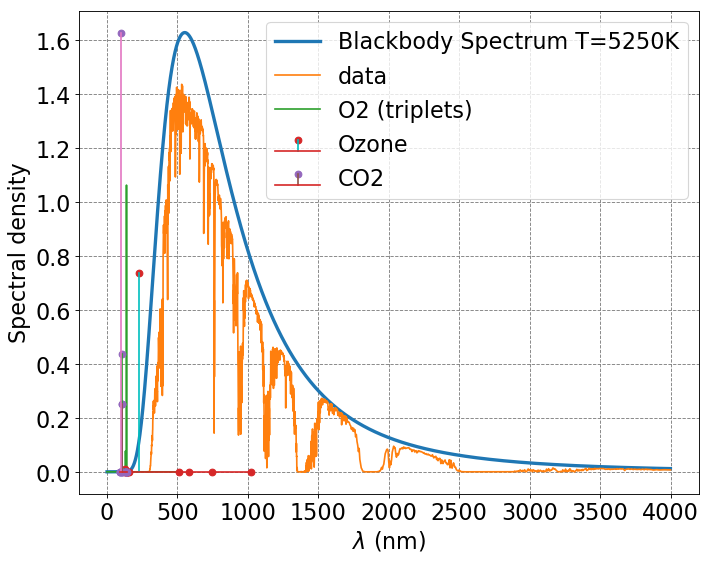

In [82]:
h = 6.626E-34  # J*s
c = 3.0E8      # m/s
kB = 1.380E-23 # J/K
nm_to_m = 1.0E-9 # convert nm to m

solar = np.loadtxt("solarspectrum_nrel.txt",skiprows=1)
o2 = np.loadtxt("oxygen_wB97X.stick.dat")
o3 = np.loadtxt("o3_stick.txt")
co2 = np.loadtxt("co2_stick.txt",skiprows=1)
# quantum spectral distribution function
def quantumB(x,T):
    return 2*h*c**2/(x*nm_to_m)**5/(np.exp(h*c/(x*nm_to_m*kB*T))-1)

# initialize a figure
ax = define_figure(xlabel="$\lambda$ (nm)",ylabel="Spectral density")
# make an array containing domain of wavelengths to consider
x = np.arange(1.0,4000,1)
#plt.ylim((0.0,np.amax(quantumB(x,3000))*1.25))
# plot quantum result
ax.plot(x,quantumB(x,5250)*1E-13,label="Blackbody Spectrum T=5250K",lw=3)
ax.plot(solar[:,0],solar[:,3],label="data")
ax.plot(o2[:,0],o2[:,1]*5,label="O2 (triplets)")
ax.stem(o3[:,0],o3[:,1]*5,label="Ozone",linefmt="c-",markerfmt="o")
ax.stem(co2[:,1],co2[:,3]*5,label="CO2",linefmt="-",markerfmt="o")
# make legend
ax.legend(fontsize=20,markerscale=5.0)

## Infrared Absorption Spectroscopy

In order to probe the vibrations of a molecule using experiment, we must shine a light on the molecule.  Light produces an electromagnetic field, $\mathbf{E}$, which can be approximatly written as

$\mathbf{E} = \mathbf{E}_0 cos2\pi\nu t$,

where $\nu$ is the frequency of the radiation and $\mathbf{E}_0$ is the electric field vector.  Note that this field is for monochromatic light and has an explicit time dependence.  

Hitting a system with this light leads to a change in the Hamiltonian of the system.  That is, the wavefunction of the molecule is perturbed by the presence of the electromagnetic field.  The perturbation to the Hamiltonian can be written as

$\hat{H}^{(1)} = -\mathbf{\mu}\cdot\mathbf{E} = -\mathbf{\mu}\mathbf{E}_0 cos2\pi\nu t$

where $\mu$ is the dipole moment of the molecule.  The complete Hamiltonian for the system is then

$\hat{H} = \hat{H}^{(0)} + \hat{H}^{(1)}$,

where $\hat{H}^{(0)}$ is the Hamiltonian of the isolated molecule.   This Hamiltonian has explicit time dependence so we cannot solve the stationary state Schrodinger equation.  This problem can be solved using *time-dependent perturbation theory* but we will not do so now.  Instead we will use some of the restuls from this solution.  

## Transition dipole moment

Time-dependent perturbation theory on the above Hamiltonian leads to defining what is called the *transition dipole moment* for a molecule.  This is defined as

$\langle \nu | \mu_z | \nu'\rangle = \int_{-\infty}^{\infty} \psi_\nu(x)\mu_z(x)\psi_{\nu'}(x)dx$,

where $\nu\rangle$ are stationary state solutions of the $\hat{H}^{(0)}$ Hamiltonian (isolated molecule).  This quantity dictates the absorpition of a transition from state $\nu$ to a state $\nu'$.  

We now expand $\mu_z(x)$ about the equilibrium position ($x=0$)

$\mu_z(x) = \mu_0 + \left( \frac{d\mu}{dx}\right)_0x + ...$

where $\mu_0$ is the dipole moment at the equilibrium position and $x$ is the displacement from that position.  Substituting this expansion truncated to second order into the transition dipole moment we get

$\langle \nu | \mu_z | \nu'\rangle = \mu_0 \langle \nu | \nu'\rangle + \left( \frac{d\mu}{dx}\right)_0 \langle \nu |x| \nu'\rangle $.

**Harmonic Oscillator** 

The above expression is for a general $\hat{H}^{(0)}$.  We now investigate the Harmonic Oscillator (HO) system with $\hat{H}^{(0)} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2}$.  The first term on the right-hand side of the above equality is zero for $\nu \neq \nu'$ due to the orthogonality of HO wavefunctions.  In order to assess the value of the second term, we must recall that the generic HO wavefunction is given as

$\psi_\nu(x) = N_\nu H_\nu(\alpha^{1/2}x)e^{-\alpha x^2/2}$

where $H_\nu(\alpha^{1/2}x)$ is a Hermite polynomial.  There are a few properties of Hermite polynomials that are quite important.  One is that they are orthogonal.  The one we will use to investigate the transition dipole moment is

$xH_\nu(x) = \nu H_{\nu-1}(x) + \frac{1}{2}H_{\nu+1}(x)$.  

If we plug this relationship into the integral above we get

$\langle \nu | \mu_z | \nu'\rangle =  \left( \frac{d\mu}{dx}\right)_0 \langle \nu |x| \nu'\rangle = \frac{N_\nu N_{\nu'}}{\alpha}\left( \frac{d\mu}{dx}\right)_0\int_{-\infty}^{\infty} H_{\nu'}(\xi)\left[\nu H_{\nu-1}(\xi) + \frac{1}{2}H_{\nu+1}(\xi)\right]e^{-\xi^2}d\xi$,

where we have made the substition $\xi = \alpha^{1/2}x$.  Observe that the above equation is nonzero except when $\nu' = \nu \pm 1$.  This demonstrates the selection rule for a harmonic oscillator.

## Selection Rules 

$\Delta \nu = \pm 1$

In [70]:
# lets quantify this for HO wavefunctions
import numpy as np
from scipy import integrate
from scipy.special import hermite
from scipy.special import factorial
# start by defining N function for analytic solution to HO wavefunctions
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25
def ho_psi(n,x):
    x2 = np.power(x,2)
    return (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x2/2.0)
hbar = 1.0
k = 1.0
m = 1.0
alpha = np.sqrt(k*m)/hbar
x = np.arange(-20,20,0.01)
psi0 = ho_psi(0,x)
psi1 = ho_psi(1,x)
psi2 = ho_psi(2,x)

print("<0|x|0> = ", integrate.simps(psi0*x*psi0,x))
print("<0|x|1> = ", integrate.simps(psi0*x*psi1,x))
print("<0|x|2> = ", integrate.simps(psi0*x*psi2,x))
print("<1|x|2> = ", integrate.simps(psi1*x*psi2,x))

<0|x|0> =  5.551115123125783e-17
<0|x|1> =  -0.7071067811865475
<0|x|2> =  2.7755575615628914e-17
<1|x|2> =  -1.0


## Normal Modes

In a polyatomic molecule we can write out each bond as a harmonic oscillator.  This leads to an energy function

$\hat{H}(\mathbf{R}) = 0.5 \sum_{i=1}^N k_ix_i^2$,

where $\mathbf{R}$ are the coordinates of all atoms, $N$ is the number of bonds in the molecule, $k_i$ is the force constant of bond $i$, and $x_i$ is the displacement from equilibrium position for bond $i$.  This equation is for a set of coupled harmonic oscillators, multiple $x_i$s will depend on the position of one atom, making it quite a challenging problem to solve.  If, instead, we can change our basis and write this as sum over independent harmonic oscillators

$\hat{H}(\mathbf{Q}) = 0.5 \sum_{i=1}^N k_iq_i^2$,

where $\mathbf{Q}$ are the transformed coordinates and $q_i$ is the displacement from equilibrium for oscillator $i$.  $\mathbf{Q}$  are typically reffered to as the normal modes of the system.  These are found by diagonlizing the Hessian matrix.  The Hessian matrix, $\mathbf{H}$, is the second derivative matrix an element of which is defined as

$H_{ij} = \frac{d^2E}{dx_idx_j}$.

*Example: Coupled Oscillators in 1D*

Consider a system with two masses, $m_1$ and $m_2$, $m_1$ is connected to a wall by a sprint, $m_2$ is connected to a wall by another spring and the two masses are connected together with a third spring.  The Hamiltonian for the system can be written as

$H(\mathbf{x}_1,\mathbf{x}_2) = 1/2k_1(x_1-x_1^0)^2 + 1/2k_2(x_2-x_2^0)^2 + 1/2k_3((x_2-x_1) - x_{12}^0)^2$

where $x_1$ is the position of mass 1, $x_1^0$ is the equilibrium position of spring 1 etc.  We note that the last term in the Hamiltonian couples the positions of masses 1 and 2 and is what makes this problem somewhat challenging.  We will use normal modes to decouple these.  We need to compute and then diagonalize the Hessian matrix.  In this case the Hessian matrix is a 2x2 matrix:

$\mathbf{H} = \begin{bmatrix} \frac{d^2E}{dx_1^2} & \frac{d^2E}{dx_1dx_2} \\ \frac{d^2E}{dx_2dx_1}& \frac{d^2E}{dx_2^2}\end{bmatrix} = \begin{bmatrix} k_1 + k_2 & -k_3 \\ -k_3 & k_2+k_3\end{bmatrix}$

In [71]:
# toy problem
k1 = 1.0
k2 = 1.0
k3 = 1.0
H = np.matrix([[k1+k2,-k3],[-k3,k2+k3]],dtype=float)
e,v=np.linalg.eig(H)
print(v)
print(e)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[3. 1.]
